In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2]:
data_file = "conso.txt"

In [3]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [4]:
text='test'
filename='text.txt'
#save_text(filename)

In [5]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [6]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


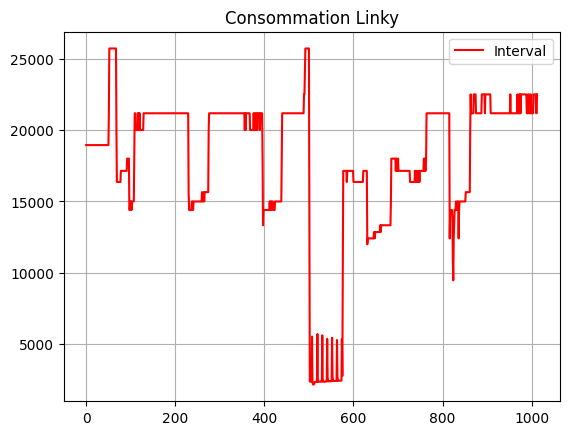

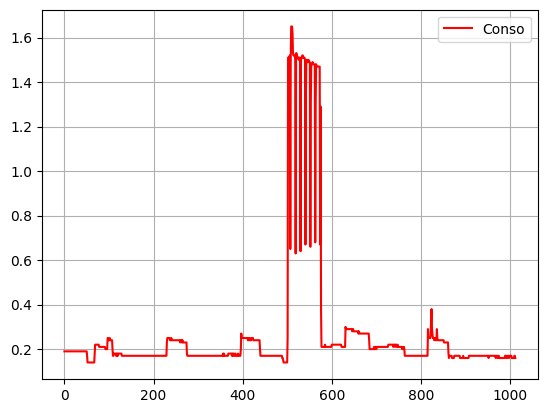

In [7]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [8]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [9]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178045 entries, 0 to 178044
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  178045 non-null  int64  
 1   kWh       178045 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.7 MB


In [10]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
178040,29067,0.12
178041,29191,0.12
178042,29078,0.12
178043,29069,0.12


<Axes: >

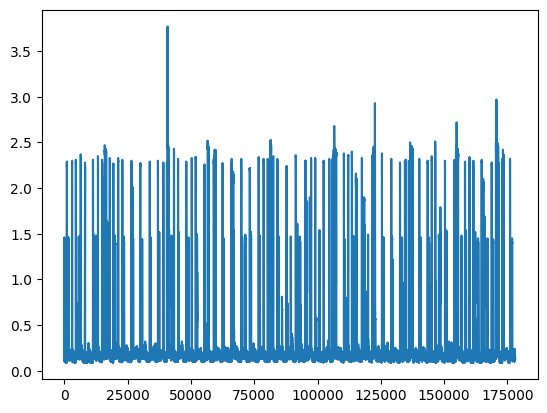

In [11]:
conso_data['kWh'].plot()

In [12]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
178040,29067,0.12,29.067,123.851791,4212278531
178041,29191,0.12,29.191,123.325683,4212307722
178042,29078,0.12,29.078,123.804938,4212336800
178043,29069,0.12,29.069,123.843269,4212365869


In [13]:
# index dernier echantillon
l=len(conso_data)-1
l

178044

In [14]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4212392662000

In [15]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 49, 6, 503845)

In [16]:
old

False

In [17]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178045 entries, 0 to 178044
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   178045 non-null  int64         
 1   kWh        178045 non-null  float64       
 2   sec        178045 non-null  float64       
 3   Wh         178045 non-null  float64       
 4   cumul(ms)  178045 non-null  int64         
 5   dates      178045 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 8.2 MB


In [18]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:49:32.792845,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:49:59.035845,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:50:24.920845,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:50:50.674845,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:51:16.448845,07/03/2024
...,...,...,...,...,...,...,...
178040,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024
178041,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024
178042,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024
178043,29069,0.12,29.069,123.843269,4212365869,2024-04-24 19:55:12.372845,24/04/2024


In [19]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:49:32.792845   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 178044     26793  0.13  26.793  134.363453  4212392662   
 
                             dates        days  
 178044 2024-04-24 19:55:39.165845  24/04/2024  )

In [20]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('24/04/2024', 4, 2024)

In [21]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
175313,38121,0.09,38.121,94.436138,4140662913,2024-04-24 00:00:09.416845,24/04/2024
175314,36731,0.10,36.731,98.009855,4140699644,2024-04-24 00:00:46.147845,24/04/2024
175315,35159,0.10,35.159,102.391991,4140734803,2024-04-24 00:01:21.306845,24/04/2024
175316,36587,0.10,36.587,98.395605,4140771390,2024-04-24 00:01:57.893845,24/04/2024
175317,37319,0.10,37.319,96.465607,4140808709,2024-04-24 00:02:35.212845,24/04/2024
...,...,...,...,...,...,...,...
178040,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024
178041,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024
178042,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024
178043,29069,0.12,29.069,123.843269,4212365869,2024-04-24 19:55:12.372845,24/04/2024


In [22]:
day

'24/04/2024'

In [23]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:49:32.792845,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:49:59.035845,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:50:24.920845,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:50:50.674845,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:51:16.448845,07/03/2024
...,...,...,...,...,...,...,...
178040,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024
178041,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024
178042,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024
178043,29069,0.12,29.069,123.843269,4212365869,2024-04-24 19:55:12.372845,24/04/2024


In [24]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [25]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.138
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.533
11/03/2024,4.543
12/03/2024,3.555
13/03/2024,3.540
14/03/2024,3.655
15/03/2024,3.563


In [26]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.327565
dtype: float64

In [27]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.633571
dtype: float64

In [28]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [29]:
df_grp

,kWh
days,
07/03/2024,3.138
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.533
11/03/2024,4.543
12/03/2024,3.555
13/03/2024,3.540
14/03/2024,3.655
15/03/2024,3.563


In [30]:
#manuel
#day = '11/03/2024'


In [31]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

2732

In [32]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
175313,38121,0.09,38.121,94.436138,4140662913,2024-04-24 00:00:09.416845,24/04/2024
175314,36731,0.10,36.731,98.009855,4140699644,2024-04-24 00:00:46.147845,24/04/2024
175315,35159,0.10,35.159,102.391991,4140734803,2024-04-24 00:01:21.306845,24/04/2024
175316,36587,0.10,36.587,98.395605,4140771390,2024-04-24 00:01:57.893845,24/04/2024
175317,37319,0.10,37.319,96.465607,4140808709,2024-04-24 00:02:35.212845,24/04/2024
...,...,...,...,...,...,...,...
178040,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024
178041,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024
178042,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024
178043,29069,0.12,29.069,123.843269,4212365869,2024-04-24 19:55:12.372845,24/04/2024


In [33]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [34]:
conso_day.head(1).dates, conso_day.tail(1).dates


(175313   2024-04-24 00:00:09.416845
 Name: dates, dtype: datetime64[ns],
 178044   2024-04-24 19:55:39.165845
 Name: dates, dtype: datetime64[ns])

In [35]:
conso_day.loc[:,'dates']

175313   2024-04-24 00:00:09.416845
175314   2024-04-24 00:00:46.147845
175315   2024-04-24 00:01:21.306845
175316   2024-04-24 00:01:57.893845
175317   2024-04-24 00:02:35.212845
                    ...            
178040   2024-04-24 19:53:45.034845
178041   2024-04-24 19:54:14.225845
178042   2024-04-24 19:54:43.303845
178043   2024-04-24 19:55:12.372845
178044   2024-04-24 19:55:39.165845
Name: dates, Length: 2732, dtype: datetime64[ns]

In [36]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_11680\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:9,38121,0.09,38.121,94.436138,4140662913,2024-04-24 00:00:09.416845,24/04/2024
0:0:46,36731,0.10,36.731,98.009855,4140699644,2024-04-24 00:00:46.147845,24/04/2024
0:1:21,35159,0.10,35.159,102.391991,4140734803,2024-04-24 00:01:21.306845,24/04/2024
0:1:57,36587,0.10,36.587,98.395605,4140771390,2024-04-24 00:01:57.893845,24/04/2024
0:2:35,37319,0.10,37.319,96.465607,4140808709,2024-04-24 00:02:35.212845,24/04/2024
...,...,...,...,...,...,...,...
19:53:45,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024
19:54:14,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024
19:54:43,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024


In [37]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('19:55:42', 2.732)

In [38]:
conso_jour=len(df['kWh'])

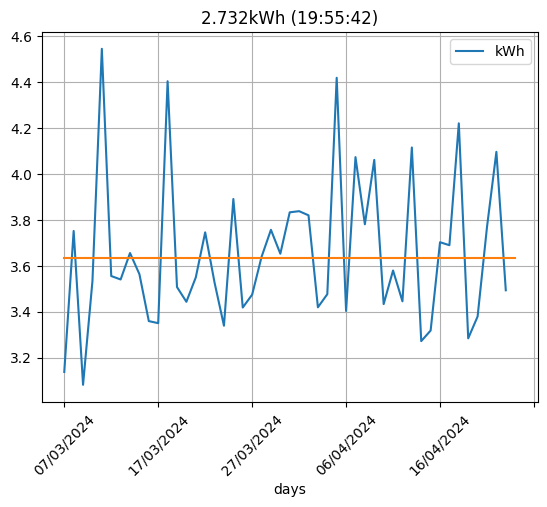

In [39]:
df_grp.iloc[:-1].plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.title(str(len(df)/1000)+'kWh ('+str(here)+')')
plt.xticks(rotation=45)
plt.grid()


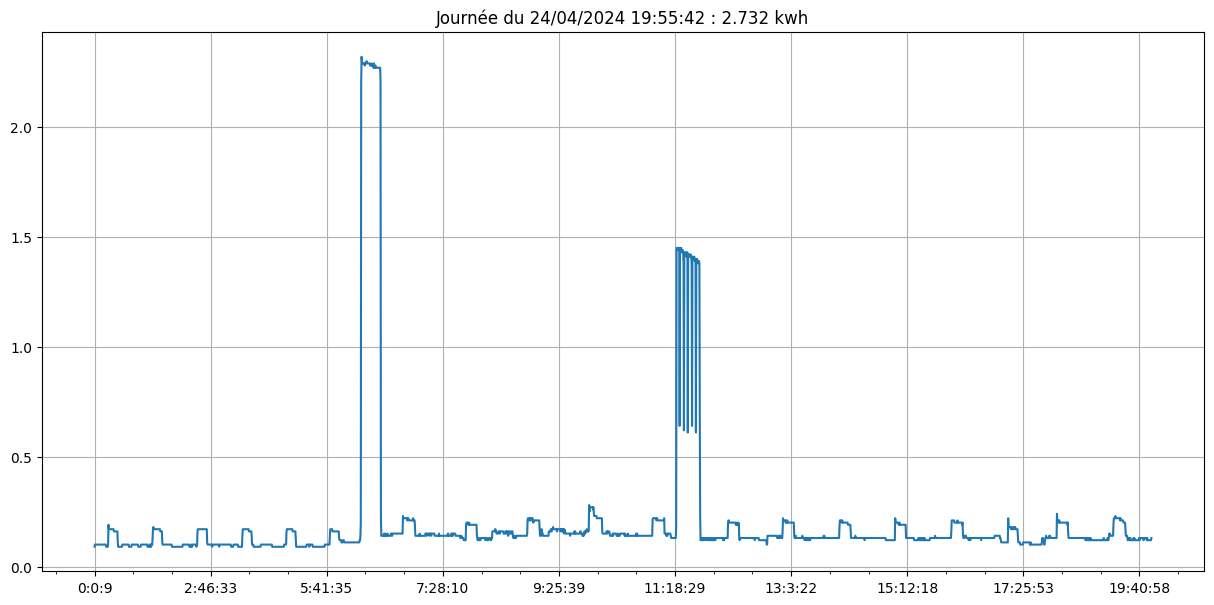

In [40]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [41]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]
df['power']

heure
0:0:9       0.09
0:0:46      0.10
0:1:21      0.10
0:1:57      0.10
0:2:35      0.10
            ... 
19:53:45    0.12
19:54:14    0.12
19:54:43    0.12
19:55:12    0.12
19:55:39    0.13
Name: power, Length: 2732, dtype: float64

<Axes: xlabel='heure'>

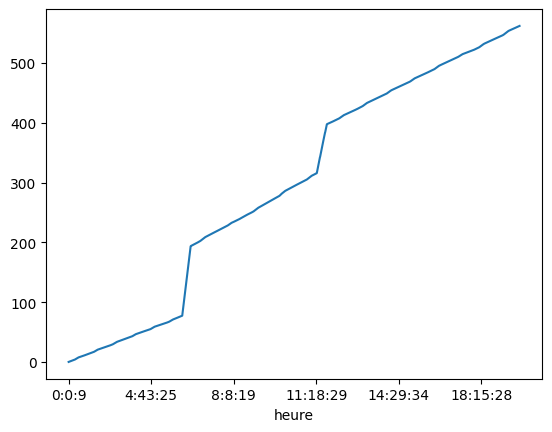

In [42]:
evo=df['power'].cumsum()
evo.plot()

112

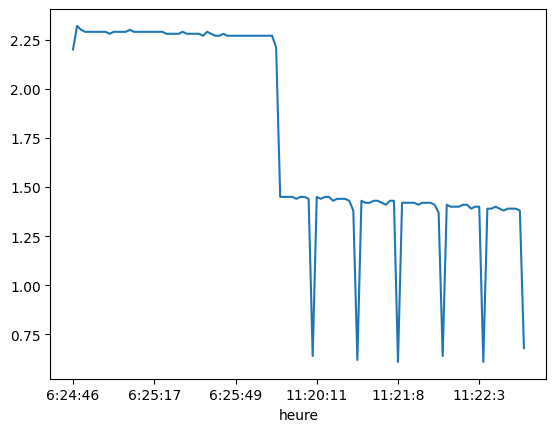

In [43]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

2097

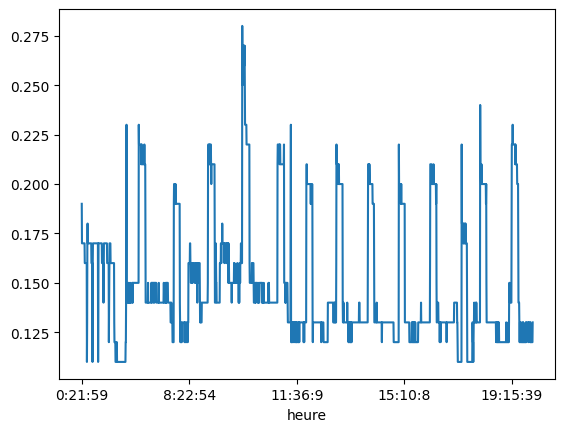

In [44]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

2620

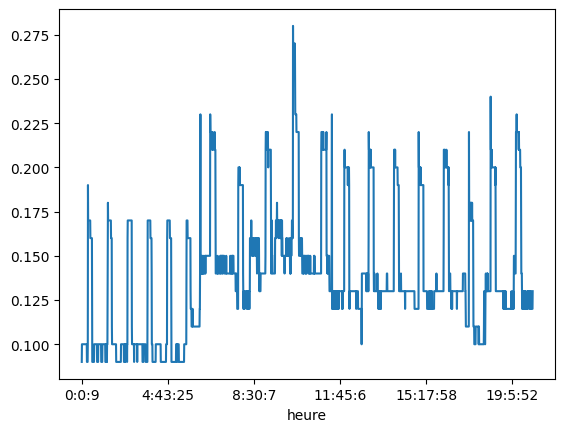

In [45]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [46]:
time = conso_data['dates']
#time


In [47]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [48]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [49]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

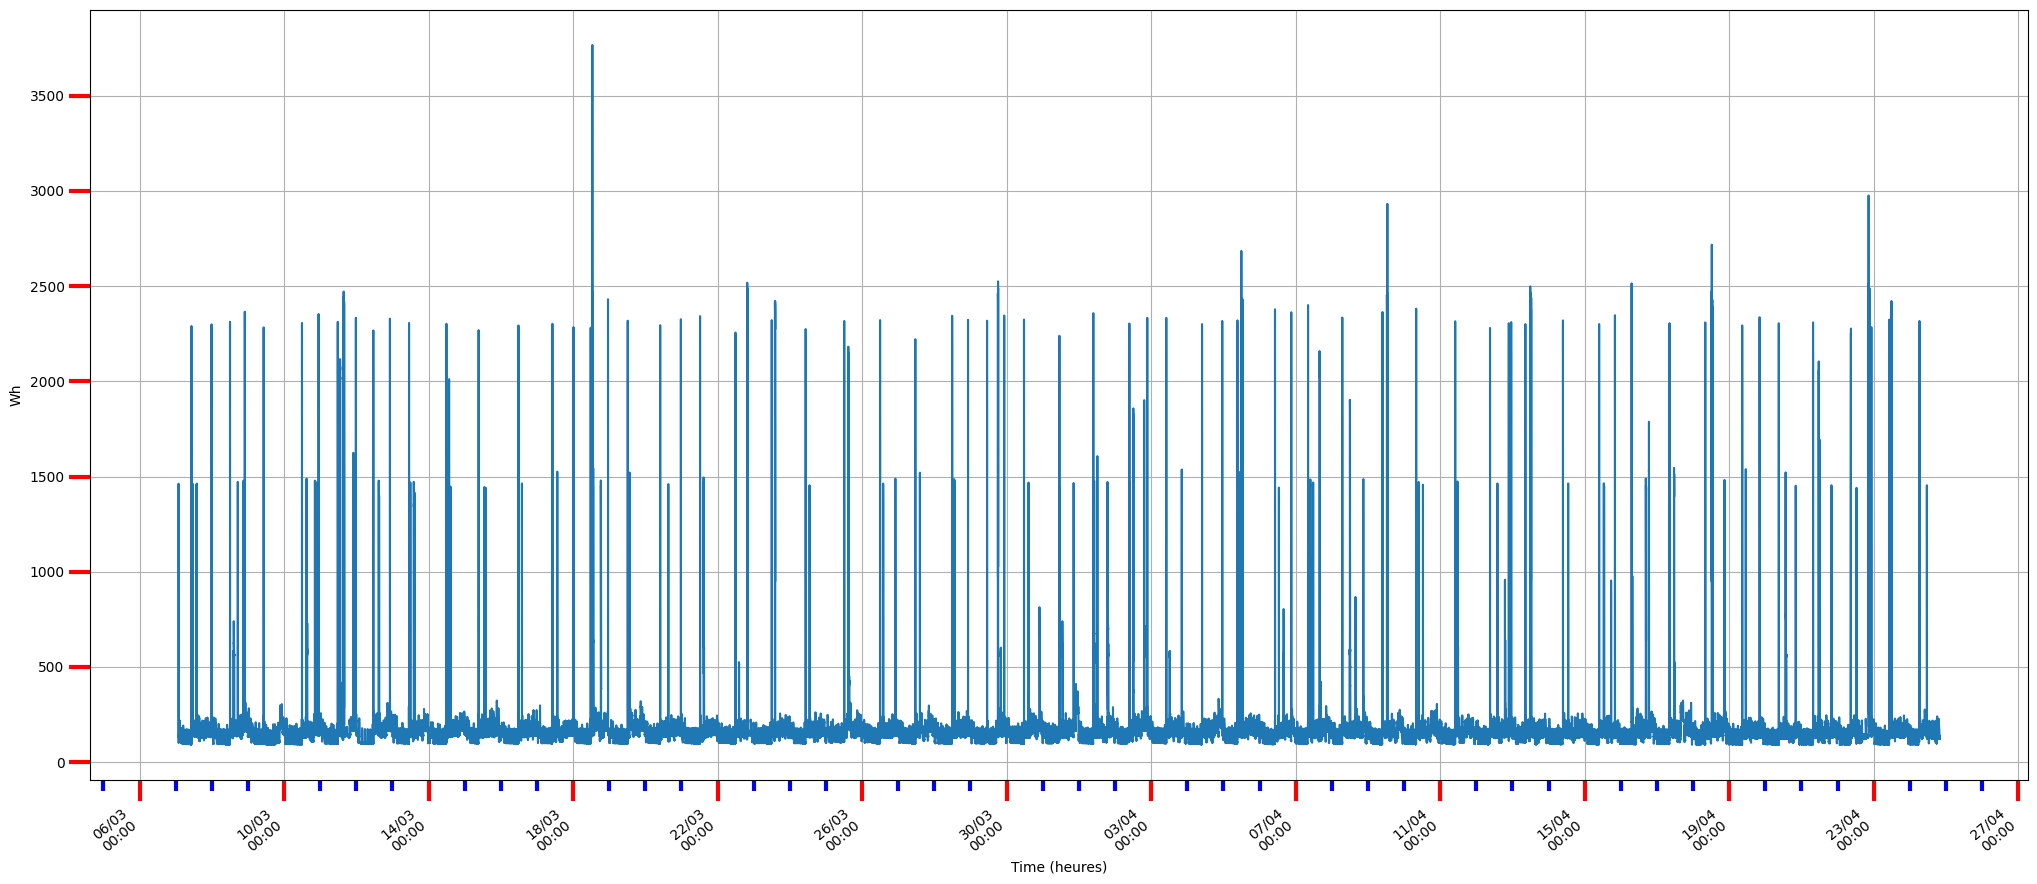

In [50]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [51]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
178044,26793,0.13,26.793,134.363453,4212392662,2024-04-24 19:55:39.165845,24/04/2024


In [52]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4212392662000

# Slice of last 1 kWh

In [53]:
l = len(conso_data)  # total watt consommés
l

178045

In [54]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(178045, 1000)

In [55]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [56]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 177045     29442  0.12  29.442  122.274302  4186031823   
 177046     29443  0.12  29.443  122.270149  4186061266   
 177047     29197  0.12  29.197  123.300339  4186090463   
 177048     29307  0.12  29.307  122.837547  4186119770   
 177049     31220  0.12  31.220  115.310698  4186150990   
 ...          ...   ...     ...         ...         ...   
 178040     29067  0.12  29.067  123.851791  4212278531   
 178041     29191  0.12  29.191  123.325683  4212307722   
 178042     29078  0.12  29.078  123.804938  4212336800   
 178043     29069  0.12  29.069  123.843269  4212365869   
 178044     26793  0.13  26.793  134.363453  4212392662   
 
                             dates        days  
 177045 2024-04-24 12:36:18.326845  24/04/2024  
 177046 2024-04-24 12:36:47.769845  24/04/2024  
 177047 2024-04-24 12:37:16.966845  24/04/2024  
 177048 2024-04-24 12:37:46.273845  24/04/2024  
 177049 2024-04-24 12:38:17.493845  24

In [57]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [58]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [59]:
cumtime_end,cumtime_start

(4212392662000, 4186061266000)

In [60]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

26331396000

In [61]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 24, 19, 55, 49, 388534),
 datetime.datetime(2024, 4, 24, 12, 36, 57, 992534),
 '24/04/2024 19:55:39')

In [62]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:49:32.792845,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:49:59.035845,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:50:24.920845,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:50:50.674845,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:51:16.448845,07/03/2024
...,...,...,...,...,...,...,...
178040,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024
178041,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024
178042,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024
178043,29069,0.12,29.069,123.843269,4212365869,2024-04-24 19:55:12.372845,24/04/2024


In [63]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('24/04/2024 12:36:47', '24/04/2024 19:55:39')

In [64]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-24 12:36:18.326845', '2024-04-24 19:55:39.165845')

In [65]:
k

1

In [66]:
data.Interval.tail(1000)

177045    29442
177046    29443
177047    29197
177048    29307
177049    31220
          ...  
178040    29067
178041    29191
178042    29078
178043    29069
178044    26793
Name: Interval, Length: 1000, dtype: int64

In [67]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(7.330633611111112, 3.2739325511539645, 7, 19, 50)

In [68]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_11680\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [69]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
177045,29442,0.12,29.442,122.274302,4186031823,2024-04-24 12:36:18.326845,24/04/2024,2024-04-24 12:36:18.326845
177046,29443,0.12,29.443,122.270149,4186061266,2024-04-24 12:36:47.769845,24/04/2024,2024-04-24 12:36:47.769845
177047,29197,0.12,29.197,123.300339,4186090463,2024-04-24 12:37:16.966845,24/04/2024,2024-04-24 12:37:16.966845
177048,29307,0.12,29.307,122.837547,4186119770,2024-04-24 12:37:46.273845,24/04/2024,2024-04-24 12:37:46.273845
177049,31220,0.12,31.220,115.310698,4186150990,2024-04-24 12:38:17.493845,24/04/2024,2024-04-24 12:38:17.493845
...,...,...,...,...,...,...,...,...
178040,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024,2024-04-24 19:53:45.034845
178041,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024,2024-04-24 19:54:14.225845
178042,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024,2024-04-24 19:54:43.303845
178043,29069,0.12,29.069,123.843269,4212365869,2024-04-24 19:55:12.372845,24/04/2024,2024-04-24 19:55:12.372845


<Axes: >

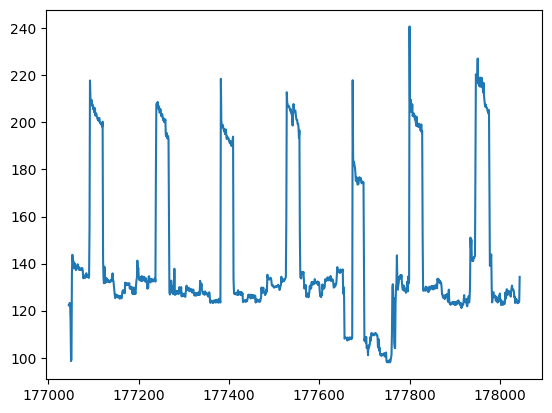

In [70]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [71]:
data['Wh']

177045    122.274302
177046    122.270149
177047    123.300339
177048    122.837547
177049    115.310698
             ...    
178040    123.851791
178041    123.325683
178042    123.804938
178043    123.843269
178044    134.363453
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

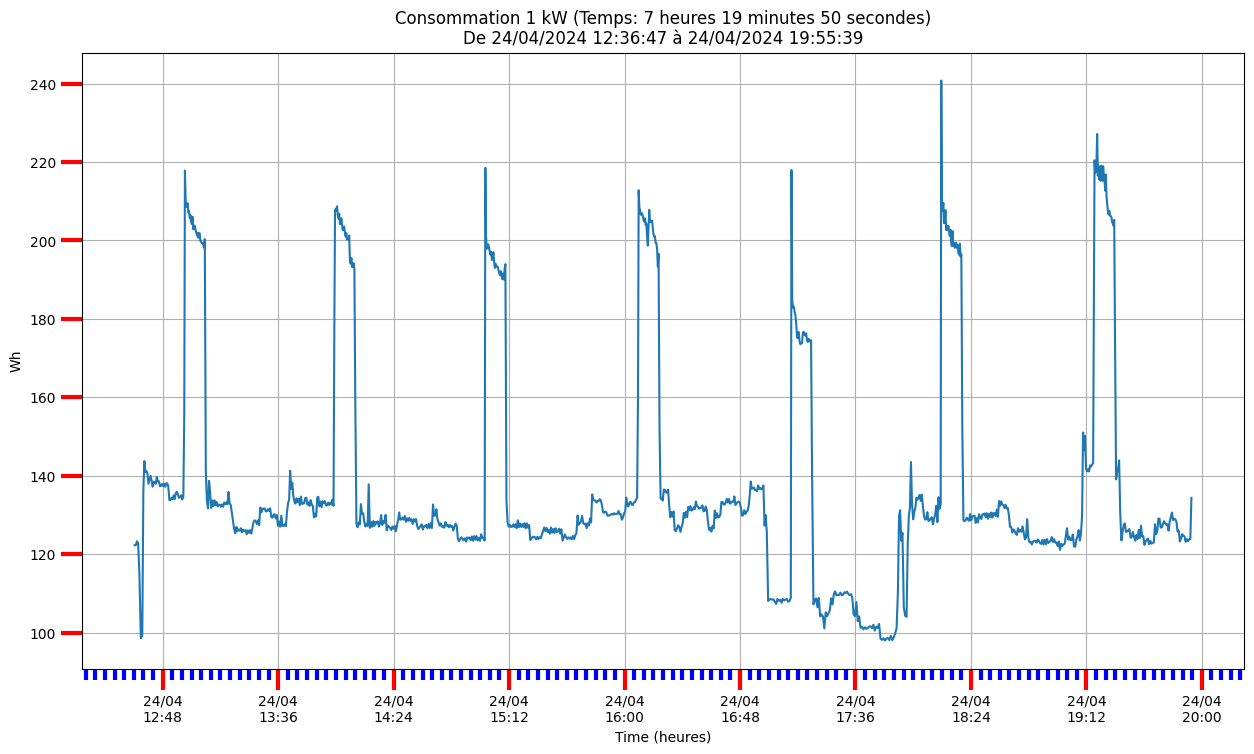

In [72]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

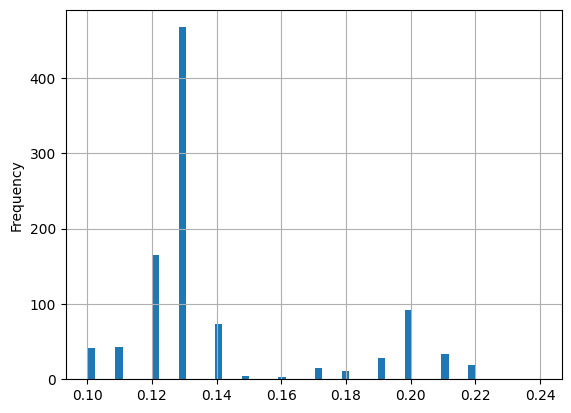

In [73]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [74]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
178040,29067,0.12,29.067,123.851791,4212278531,2024-04-24 19:53:45.034845,24/04/2024
178041,29191,0.12,29.191,123.325683,4212307722,2024-04-24 19:54:14.225845,24/04/2024
178042,29078,0.12,29.078,123.804938,4212336800,2024-04-24 19:54:43.303845,24/04/2024
178043,29069,0.12,29.069,123.843269,4212365869,2024-04-24 19:55:12.372845,24/04/2024
178044,26793,0.13,26.793,134.363453,4212392662,2024-04-24 19:55:39.165845,24/04/2024


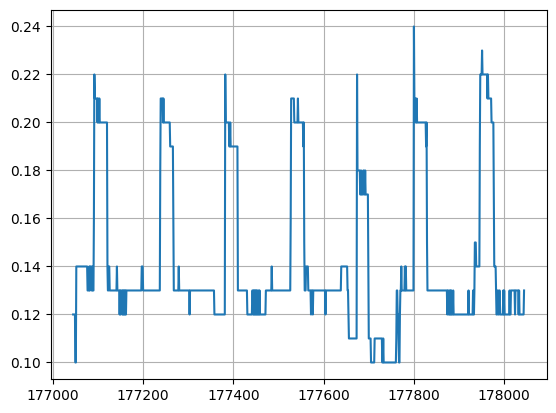

In [75]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [76]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(4212392662000.0, 70206.54436666667)

In [77]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 24, 19, 55, 52, 732913),
 datetime.datetime(2024, 3, 7, 1, 49, 20, 70913))

In [78]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(178045, 4212393, 1170.1091666666666)

In [79]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [80]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [81]:
732/12 # 60 jours

61.0

In [82]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

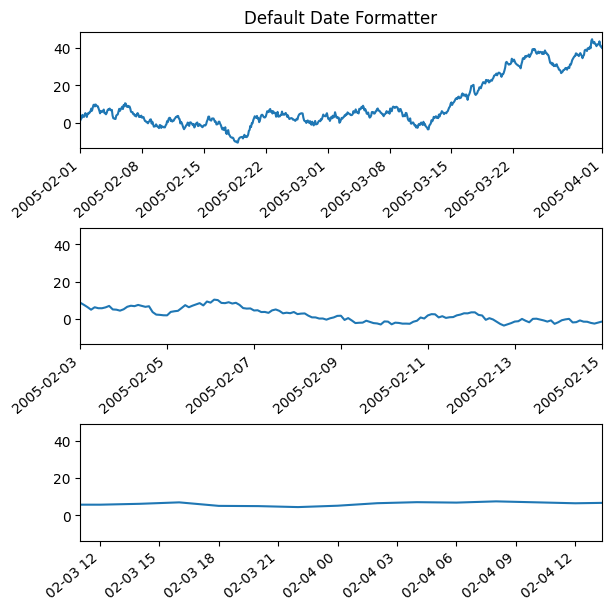

In [83]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [84]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)